In [21]:
%matplotlib inline
import tensorflow as tf
import sys
import numpy as np
sys.path.append("..") 
import d2lzh_tensorflow2 as d2l

features, labels = d2l.get_data_ch7()

def init_adadelta_states():
    s_w, s_b = np.zeros((features.shape[1], 1), dtype=float), np.zeros(1, dtype=float)
    delta_w, delta_b = np.zeros((features.shape[1], 1), dtype=float), np.zeros(1, dtype=float)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams,grads):
    rho, eps,i = hyperparams['rho'], 1e-5, 0
    for p, (s, delta) in zip(params, states):
        s[:] = rho * s + (1 - rho) * (grads[i]**2)
        g =  grads[i] * np.sqrt((delta + eps) / (s + eps))
        p.assign_sub(g)
        delta[:] = rho * delta + (1 - rho) * g * g
        i+=1

loss: 0.245219, 1.477930 sec per epoch


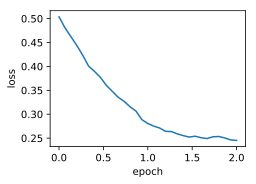

In [22]:
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.9}, features, labels)

In [25]:
from tensorflow import keras
trainer = keras.optimizers.Adadelta(learning_rate=0.01,rho=0.9)

loss: 1.403729, 1.309982 sec per epoch


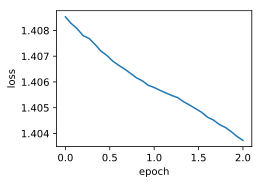

In [26]:
d2l.train_tensorflow2_ch7(trainer, {'rho': 0.9}, features, labels)